In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
import numpy.random as rnd
import pandas as pd

plt.rcParams["figure.figsize"] = (10,6)

## Problem 0: some fake data to mess with
So let's start by making some fake background data.

First, let's make a time axis that goes from 0 to 100 π  in 1e5 steps

    t = np.linspace(0,np.pi*100,np.int(1e5))

Then an offset sinusoid

    N = 10+np.sin(t)

Then some random background data whose mean and variance depend on N

    bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N

Now this is small enough at only 100,000 points that you can plot it, but it is messy and not very informative.

In [2]:
t = np.linspace(0,np.pi*100,np.int(1e5))
N = 10+np.sin(t)
bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N

<ipython-input-2-6662f362c111>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t = np.linspace(0,np.pi*100,np.int(1e5))
<ipython-input-2-6662f362c111>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; f

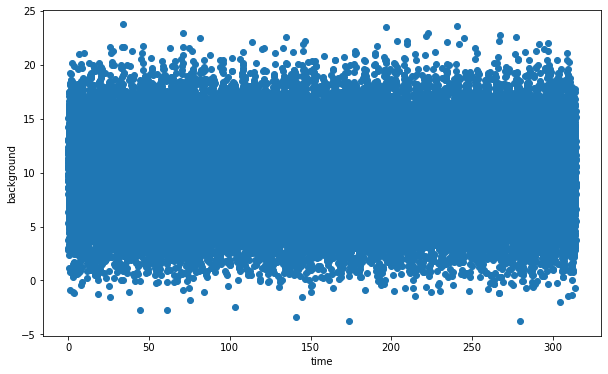

In [3]:
plt.scatter(t,bkgd)
plt.xlabel('time')
plt.ylabel('background')
plt.show()

## Problem 1: subsets of data
The idea here is to plot small portions of the data. In python this is often called array slicing, but in other languages it has no special terminology. Your goal is to figure out how to make the following plots:

1a) Make a scatter plot (not a line plot) of the first 1000 data points.

In [4]:
t_slice = t[:1000]
bkgd_slice = bkgd[:1000]

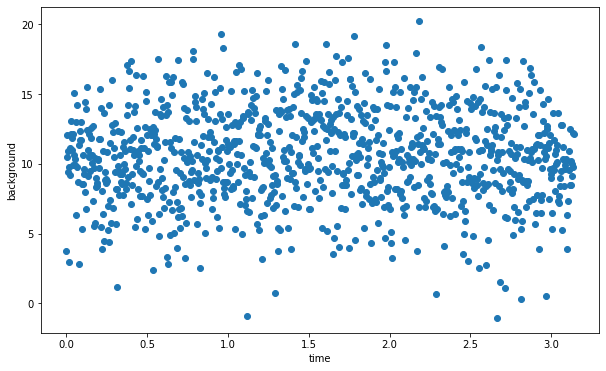

In [5]:
plt.scatter(t_slice,bkgd_slice)
plt.xlabel('time')
plt.ylabel('background')
plt.show()

1b) Generalize your code so you can make a plot of any X contiguous points (e.g. 2000 points starting at point 500), and produce an example plot of a set of data somethere in the middle of your array.

In [6]:
def region_slice(array, start, stop):
    return array[start:stop]

In [7]:
t_gen = region_slice(t, 500, 2500)
bkgd_gen = region_slice(bkgd, 500, 2500)

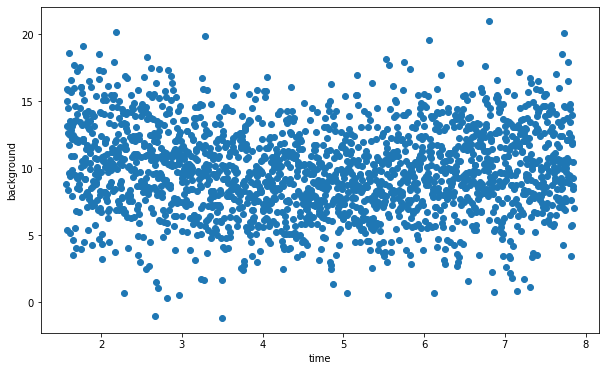

In [8]:
plt.scatter(t_gen,bkgd_gen)
plt.xlabel('time')
plt.ylabel('background')
plt.show()

1c) Sometimes you want to sample the data, such as plotting every 100th point. Make a plot of the full data range, but only every 100th point.

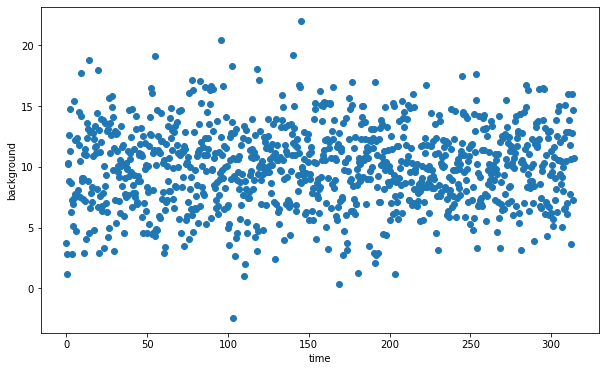

In [9]:
t_step = t[::100]
bkgd_step = bkgd[::100]
plt.scatter(t_step, bkgd_step)
plt.xlabel('time')
plt.ylabel('background')
plt.show()

## Problem 2: density

Now you can make a scatter plot of just a 100,000 points, so you might try it to see what it looks like. But particularly in the central areas the points all overlap into just a blob, and this just gets worse as the number of points goes up. What is better is to plot the density of the points. There are several ways of doing this, but a 2D histogram plot is the easiest (plt.hist2d() in python and histogram2() in MatLab).

2a) Make a 2d histogram plot. Read about options, and play with binsize so it is useful (too large a bin and everything washes out, too small and the sample noise dominates). Make sure you use a colorbar.

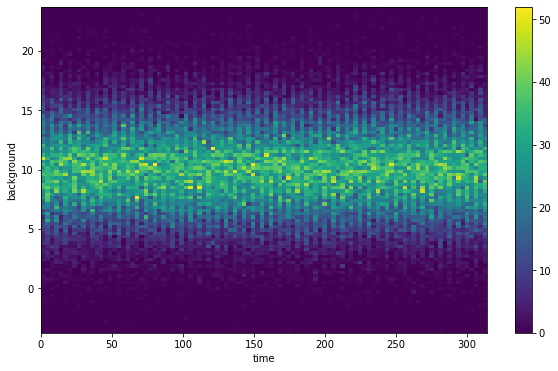

In [10]:
plt.hist2d(t, bkgd, 100)
plt.xlabel('time')
plt.ylabel('background')
plt.colorbar()
plt.show()

2b) Clearly explain what is being plotted in your plot (e.g. what does each color mean?)

The density of the points according to both time and the distribution background is being plotted. The color changes as the amount of points in each bin increases.

## Problem 3: folding
Now if you have a periodic signal, it is possible to fold the data stream at that period to make the pattern clearer.

3a) Make an new time variable that folds at a period of  2π  (the modulo operator is your friend, variably expressed as mod(), %, or rem()). Then make a scatter plot of all your data, but now folded. (Reminder, for more data you'd never actually want to plot all the points.)

In [11]:
t_fold = t % (2*np.pi)
N_fold = 10+np.sin(t_fold)
bkgd_fold = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N_fold)+N_fold

<ipython-input-11-24823cc0d715>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bkgd_fold = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N_fold)+N_fold


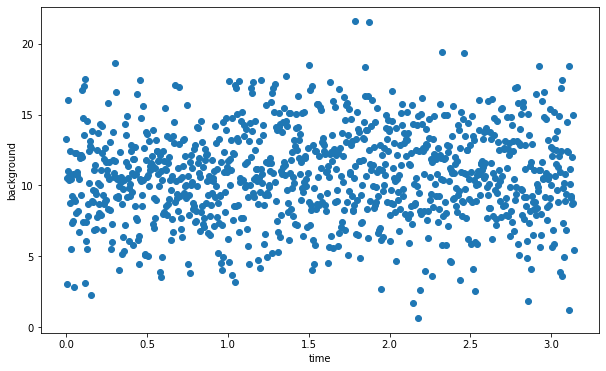

In [12]:
plt.scatter(t_fold[:1000], bkgd_fold[:1000])
plt.xlabel('time')
plt.ylabel('background')
plt.show()

3b) Make a 2D histogram plot of your folded data.

In [ ]:
plt.hist2d(t_fo, bkgd, 100)
plt.xlabel('time')
plt.ylabel('background')
plt.colorbar()
plt.show()